In [112]:
# for data manipulation
import os
import pandas as pd
import numpy as np
#for data visualization
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
#for interactive plots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
import plotly.express as px
import cufflinks as cf
#init_notebook_mode(connected=True) #for notebooks
cf.go_offline() #for offline use

# Input data files are available in the read-only "../input/" directory
for dirname, _, filenames in os.walk('/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


Loads Data 

In [113]:
df = pd.read_csv("~/Documents/pers_yea/EDA python/input/tabular-playground-series-sep-2022/train.csv",
index_col = 'date', parse_dates = True)

1. Data Exploration

In [114]:
df.head()

,row_id,country,store,product,num_sold
date,,,,,
2017-01-01,0,Belgium,KaggleMart,Kaggle Advanced Techniques,663
2017-01-01,1,Belgium,KaggleMart,Kaggle Getting Started,615
2017-01-01,2,Belgium,KaggleMart,Kaggle Recipe Book,480
2017-01-01,3,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,710
2017-01-01,4,Belgium,KaggleRama,Kaggle Advanced Techniques,240


In [115]:
## row_id is of no need to us so let's delete this column

df.drop('row_id', axis=1, inplace=True)
df.isnull().any()
 

country     False
store       False
product     False
num_sold    False
dtype: bool

In [116]:
## let's explore the type of columns or features available in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 70128 entries, 2017-01-01 to 2020-12-31
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   country   70128 non-null  object
 1   store     70128 non-null  object
 2   product   70128 non-null  object
 3   num_sold  70128 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 2.7+ MB


Only, the num_sold which is the feature to be forecasted is numeric, rest all are categorical.

First start with the date column and see entries of how many days are present in the date of the dataframe.

In [117]:
df

,country,store,product,num_sold
date,,,,
2017-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,663
2017-01-01,Belgium,KaggleMart,Kaggle Getting Started,615
2017-01-01,Belgium,KaggleMart,Kaggle Recipe Book,480
2017-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,710
2017-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques,240
...,...,...,...,...
2020-12-31,Spain,KaggleMart,Kaggle for Kids: One Smart Goose,614
2020-12-31,Spain,KaggleRama,Kaggle Advanced Techniques,215
2020-12-31,Spain,KaggleRama,Kaggle Getting Started,158


In [118]:
print('start:', df.index[0])
print('end:', df.index[-1])
print('days: ', (df.index[-1]-df.index[0]).days)


start: 2017-01-01 00:00:00
end: 2020-12-31 00:00:00
days:  1460


Let's explore the country column and see how many unique countries, stores and products are present.

In [119]:
print('unique countries: ', df['country'].nunique())
print('unique stores: ', df['store'].nunique())
print('unique products: ', df['product'].nunique())

unique countries:  6
unique stores:  2
unique products:  4


2. Visualization

In [120]:
df.resample("A").sum().iplot(
    title="Total sales in each year from 2018 - 2020", 
    xTitle='Years', 
    yTitle='Sales')


/var/folders/87/ns3c41g176ggt_26bywmsnrh0000gn/T/ipykernel_37124/661768138.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



Let's explore the Sales by countries, products and stores

In [121]:
px.bar(df.groupby('country')['num_sold'].sum(),
orientation = 'h',
title = "Total sales by Country")


In [122]:
px.bar(df.groupby('product')['num_sold'].sum(),
orientation = 'h', 
title = 'Total sales with respect to the individual product')

In [123]:
px.bar(df.groupby('store')['num_sold'].sum(),
orientation = 'h', 
title = 'Total sales with respect to the individual store')

Find the most popular product in the store

In [124]:
px.bar(df.groupby(['store','product'])['num_sold'].sum().unstack(0),
orientation='h')

Visualize all the country, product and store information in one graph.

In [125]:
dfg = df.groupby(['country','store','product']).sum().reset_index()

dfg.head()

,country,store,product,num_sold
0,Belgium,KaggleMart,Kaggle Advanced Techniques,593014
1,Belgium,KaggleMart,Kaggle Getting Started,475774
2,Belgium,KaggleMart,Kaggle Recipe Book,356371
3,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,638919
4,Belgium,KaggleRama,Kaggle Advanced Techniques,205826


In [126]:
px.bar(dfg,
x='num_sold',
y='country',
color='product',
orientation='h',
hover_data=['store'], 
barmode='group', 
text = 'store',
labels={'num_sold':'Total Sales'}
)

3. Time Series Visualization 

Plot of the total sales during the time horizon

In [127]:
df.groupby('date')['num_sold'].sum().iplot(title='Worldwide Sales from year 2017 - 2020')


/var/folders/87/ns3c41g176ggt_26bywmsnrh0000gn/T/ipykernel_37124/701612558.py:4: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



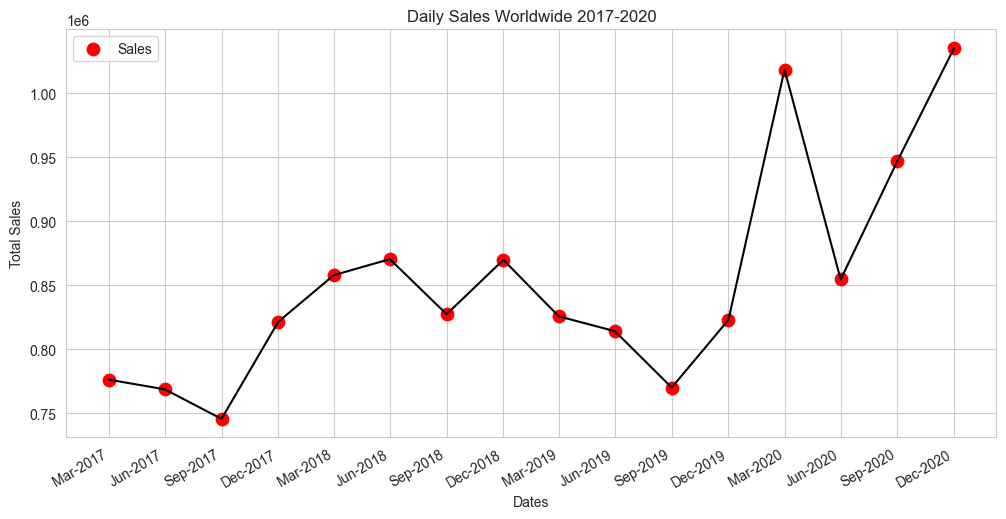

In [128]:
## lets plot yearly data with quarterly pointer to see how the sells wary month to month

sns.set_style('whitegrid')
dfm = df.resample('Q').sum()['num_sold']

plt.figure(figsize=(12, 6))
plt.title('Daily Sales Worldwide 2017-2020')
plt.xlabel('Dates')
plt.ylabel('Total Sales')
plt.plot(dfm.index, dfm.values, color='black')
plt.scatter(dfm.index, dfm.values, label='Sales', s=80, color='red')
plt.xticks(dfm.index, dfm.index)
plt.gcf().autofmt_xdate()

date_fmt = mdates.DateFormatter("%b-%Y")
plt.gca().xaxis.set_major_formatter(date_fmt)
plt.legend()


How sells are affected monthly and weekly.

/var/folders/87/ns3c41g176ggt_26bywmsnrh0000gn/T/ipykernel_37124/634523153.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



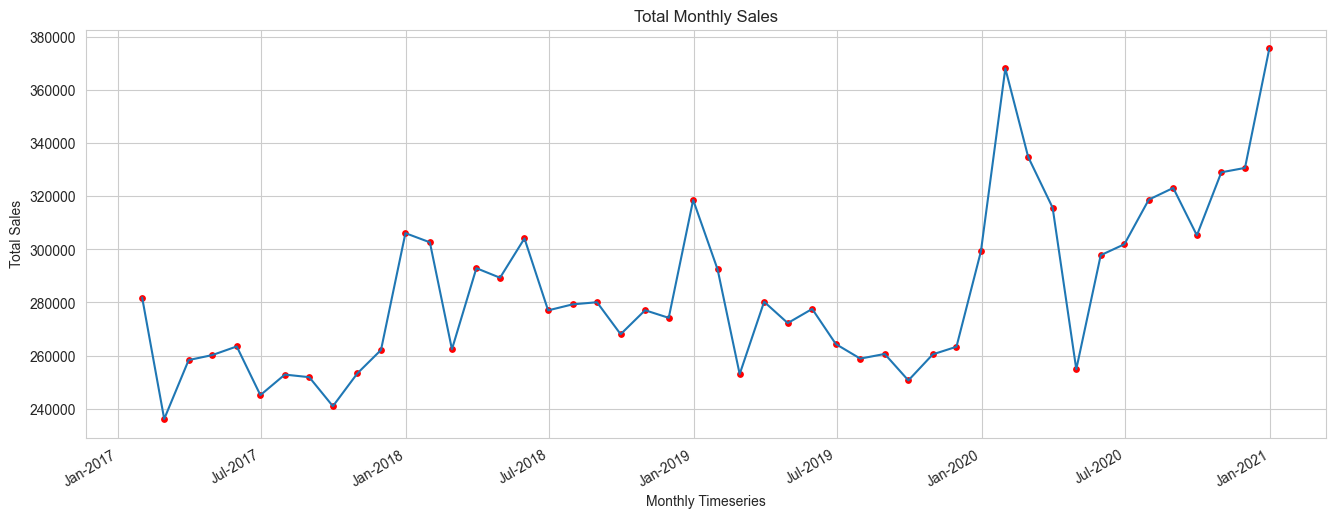

In [129]:
dfc = df.resample('M').sum()
plt.figure(figsize=(16, 6))
plt.plot(dfc.index, dfc.num_sold)
plt.scatter(dfc.index, dfc.num_sold, s=15, color='red')
plt.title('Total Monthly Sales')
plt.xlabel('Monthly Timeseries')
plt.ylabel('Total Sales')
plt.gcf().autofmt_xdate()
formater = mdates.DateFormatter("%b-%Y")
plt.gca().xaxis.set_major_formatter(formater)


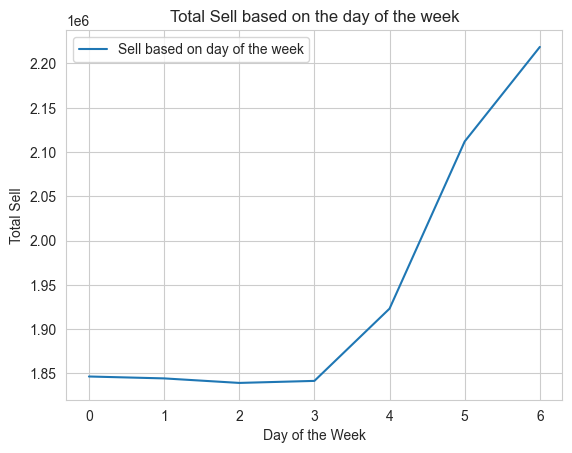

In [130]:
dfc = df.reset_index().copy()
dfc['week_day'] = dfc['date'].apply(lambda x: x.dayofweek)
dfc = dfc.groupby('week_day')['num_sold'].sum()

plt.plot(dfc.index, dfc.values, label='Sell based on day of the week')
plt.title('Total Sell based on the day of the week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sell')
plt.legend()


Sales by country

/var/folders/87/ns3c41g176ggt_26bywmsnrh0000gn/T/ipykernel_37124/89564698.py:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



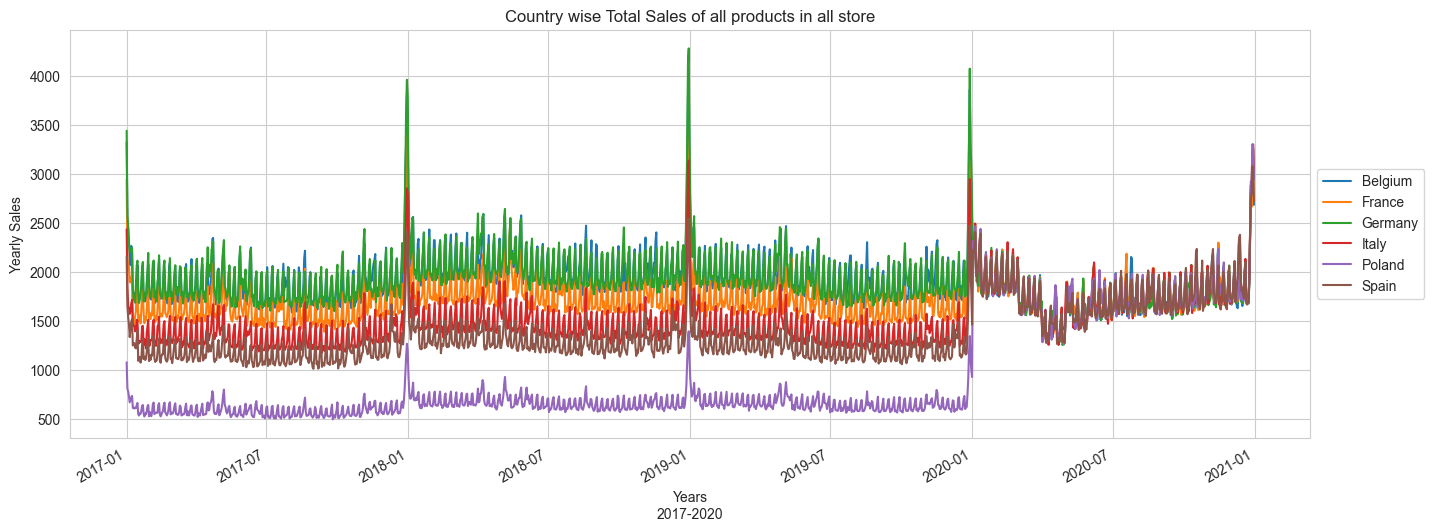

In [131]:
plt.figure(figsize=(16, 6))

ax = sns.lineplot(data=df.groupby(['date', 'country']).sum(), 
x='date', 
y='num_sold', 
hue='country')

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.xlabel('Years\n2017-2020')
plt.ylabel('Yearly Sales')
plt.title('Country wise Total Sales of all products in all store')
plt.gcf().autofmt_xdate()


Sales by store

/var/folders/87/ns3c41g176ggt_26bywmsnrh0000gn/T/ipykernel_37124/2603784473.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



<AxesSubplot: xlabel='date', ylabel='num_sold'>

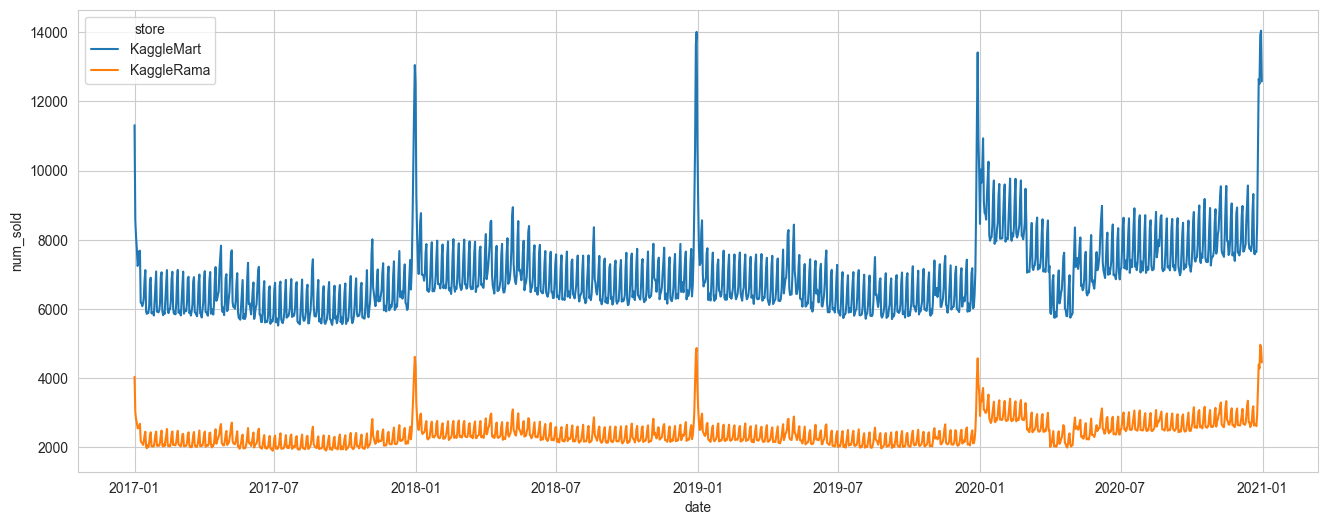

In [132]:
plt.figure(figsize=(16,6))
sns.lineplot(data=df.groupby(['date','store']).sum(), 
x='date', 
y='num_sold', 
hue='store')

In [133]:
mf = np.mean(df[df['store'] == 'KaggleMart']['num_sold'] /
             df[df['store'] == 'KaggleRama']['num_sold'])


print(
    f'The KaggleMart & KaggleRama sells are the multiplicative Factor of {mf:.3f}')


The KaggleMart & KaggleRama sells are the multiplicative Factor of 2.894


/var/folders/87/ns3c41g176ggt_26bywmsnrh0000gn/T/ipykernel_37124/3587235006.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



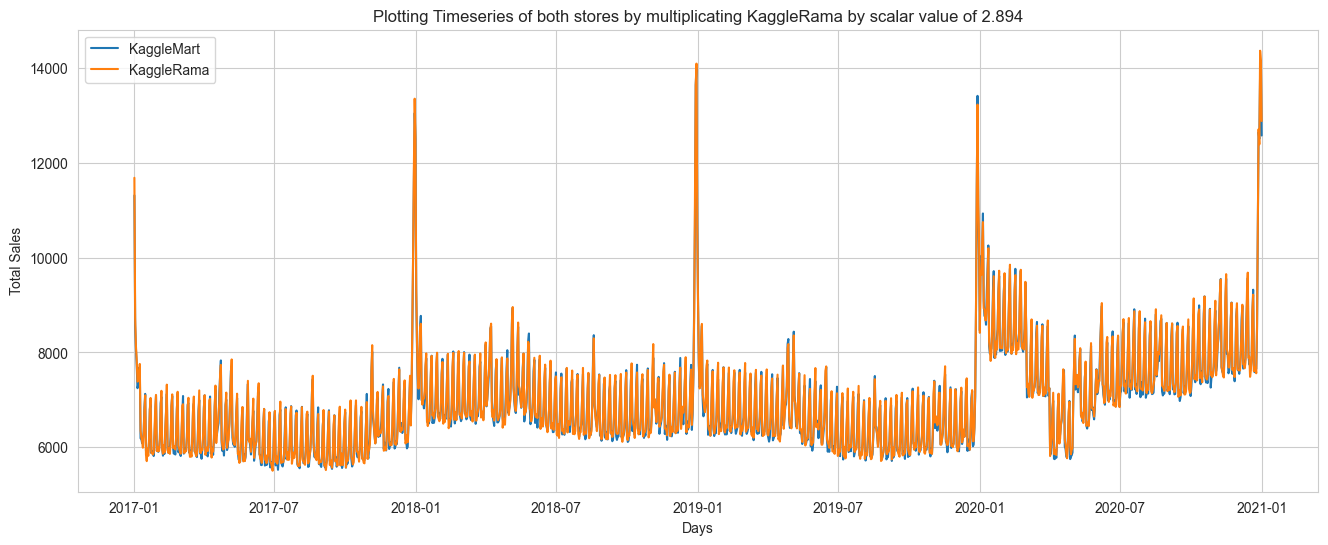

In [134]:
dfc = df.groupby(['store', 'date']).sum().unstack(0)
dfc.columns = dfc.columns.droplevel()
dfc['KaggleRama'] = dfc['KaggleRama']*2.894

plt.figure(figsize=(16, 6))
plt.title('Plotting Timeseries of both stores by multiplicating KaggleRama by scalar value of 2.894')
plt.plot(dfc.index, dfc['KaggleMart'], label='KaggleMart')
plt.plot(dfc.index, dfc['KaggleRama'], label='KaggleRama')
plt.xlabel('Days')
plt.ylabel('Total Sales')
plt.legend()


Ratio of sells produced by each store, here we want to find patterns hidden inside the store data.

Time series Seasonality

/var/folders/87/ns3c41g176ggt_26bywmsnrh0000gn/T/ipykernel_37124/3484913501.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

/var/folders/87/ns3c41g176ggt_26bywmsnrh0000gn/T/ipykernel_37124/3484913501.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



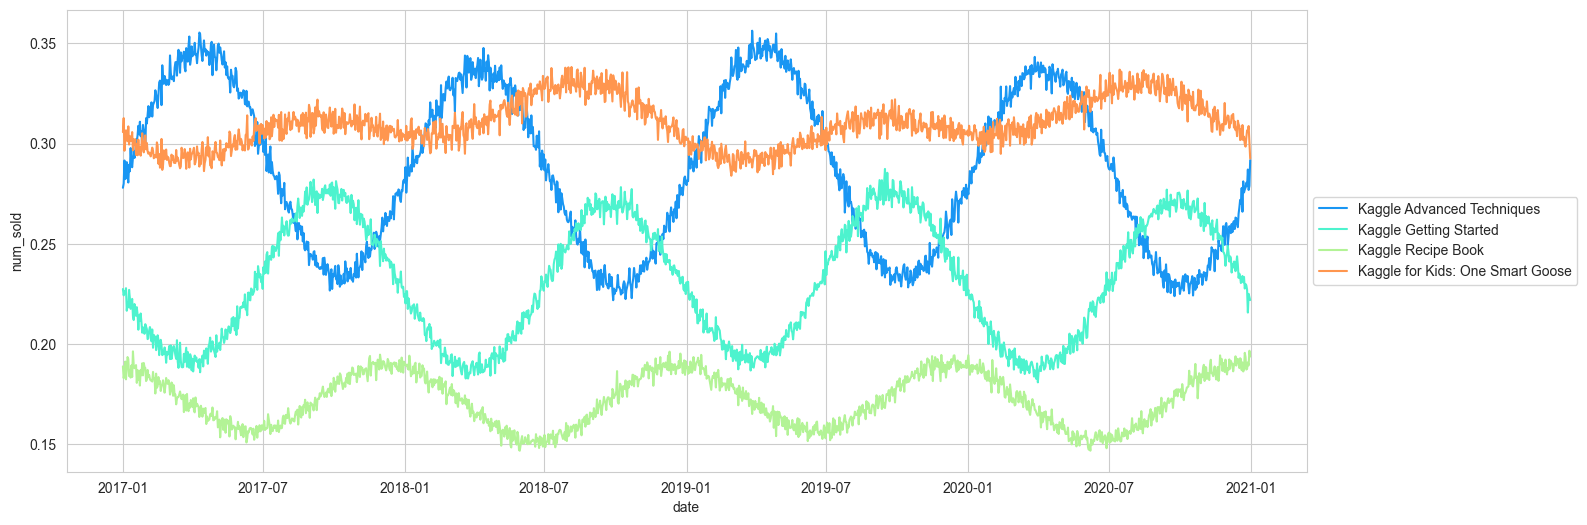

In [135]:
dfc = df.groupby(['product','date']).sum()/df.groupby(['date']).sum()

plt.figure(figsize = (16,6))
ax = sns.lineplot(data=dfc,x='date',y='num_sold',hue='product',palette='rainbow');
ax.legend(loc='center left',bbox_to_anchor=(1,0.5));

Time series Decomposition

We are defining Timeseries as Y = TxP where Y is the total sales on each day based on each country, store and product. While, T are the Sales based on each country and store on any given day, and P are the sales by each product on any given day.

In [136]:
dfc = dfc.unstack(0)
dfc.columns = dfc.columns.droplevel()
dfc = dfc.reset_index()
dfc = dfc.melt(id_vars = 'date')
dfc.columns = ['date','product','P']
train = df.reset_index()
train = pd.merge(left=train,right=dfc,on=['date','product'],how='left')

In [137]:
train['T'] = train['num_sold']/train['P']


4. Modelling

In [138]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

In [152]:
## copy a dataframe
dfx = df.reset_index()

##adding features
dfx['year'] = dfx['date'].apply(lambda x: int(x.year))
dfx['month'] = dfx['date'].apply(lambda x: int(x.month))
dfx['dayofyear'] = dfx['date'].apply(lambda x: int(x.dayofyear))
dfx['dayofweek'] = dfx['date'].apply(lambda x: int(x.dayofweek))
dfx['week'] = dfx['date'].apply(lambda x: int(x.week))
dfx['quarter'] = dfx['date'].apply(lambda x: int(x.quarter))
cols = list(dfx.columns)
cols.remove("num_sold")
cols.append("num_sold")
dfx = dfx[cols[1:]]

Compute correlations to find the most useful features

/var/folders/87/ns3c41g176ggt_26bywmsnrh0000gn/T/ipykernel_37124/2431090370.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<AxesSubplot: >

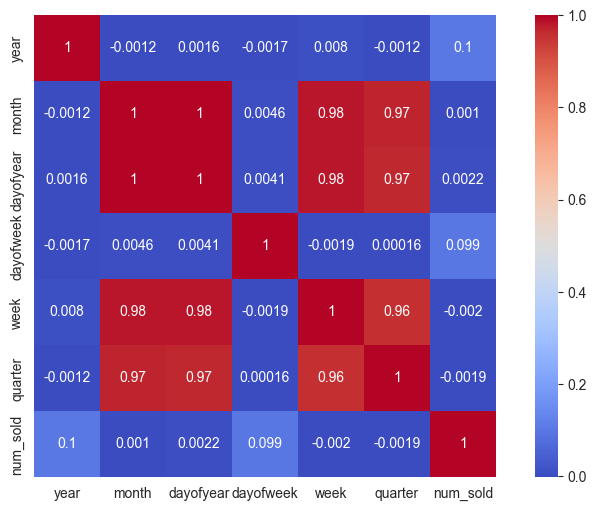

In [142]:
plt.figure(figsize=(10,6))
sns.heatmap(dfx.corr(),
square=True, 
annot=True,
cmap='coolwarm')

We can eliminate week and quarter as their correlation with num_sold is low

In [153]:
cols = [col for col in cols if not col in ['week', 'quarter']]
dfx = dfx[cols[1:]]


Data Splits 

In [154]:
cat_cols = ['country','product','store']

## let's do one hot encoding
dfx = dfx.join(pd.get_dummies(dfx[cat_cols],drop_first=True))
dfx.drop(columns=cat_cols, inplace=True)

dfx.drop('num_sold', axis=1)
X_train, X_test, y_train, y_test = train_test_split(dfx.drop('num_sold',axis=1),dfx['num_sold'],test_size=0.2,random_state=42)

LinearRegression()

Linear Regression

In [155]:
def produce_metric(test_data,true,model):
    pred = model.predict(test_data)
    print("The model has the mean absolute error equal to", mean_absolute_error(true,pred))
    print("The model has the mean squared error equal to", mean_squared_error(true,pred))

In [158]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
produce_metric(X_test,y_test,lin_reg)

The model has the mean absolute error equal to 42.3588693713774
The model has the mean squared error equal to 3246.765031375878


Random Forest

In [159]:
tree_reg = RandomForestRegressor()
tree_reg.fit(X_train, y_train)
produce_metric(X_test, y_test, tree_reg)


The model has the mean absolute error equal to 9.834403964066734
The model has the mean squared error equal to 228.41540863396548


XGBoost

In [160]:
xgb_model = xgb.XGBRegressor(objective='reg:squarederror',eval_metric= 'rmsle', early_stopping_rounds = 10,use_label_encoder=False)
xgb_model.fit(X_train,y_train,verbose=True,eval_set=[(X_test,y_test)])

[0]	validation_0-rmsle:1.17560
[1]	validation_0-rmsle:0.66549
[2]	validation_0-rmsle:0.42500
[3]	validation_0-rmsle:0.29372
[4]	validation_0-rmsle:0.21577
[5]	validation_0-rmsle:0.16843
[6]	validation_0-rmsle:0.14599
[7]	validation_0-rmsle:0.13039
[8]	validation_0-rmsle:0.11890
[9]	validation_0-rmsle:0.11406
[10]	validation_0-rmsle:0.10689
[11]	validation_0-rmsle:0.09872
[12]	validation_0-rmsle:0.09557
[13]	validation_0-rmsle:0.09418
[14]	validation_0-rmsle:0.08894
[15]	validation_0-rmsle:0.08455
[16]	validation_0-rmsle:0.08352
[17]	validation_0-rmsle:0.08173
[18]	validation_0-rmsle:0.08115
[19]	validation_0-rmsle:0.08092
[20]	validation_0-rmsle:0.07940
[21]	validation_0-rmsle:0.07818
[22]	validation_0-rmsle:0.07840
[23]	validation_0-rmsle:0.07734
[24]	validation_0-rmsle:0.07676
[25]	validation_0-rmsle:0.07628
[26]	validation_0-rmsle:0.07581
[27]	validation_0-rmsle:0.07557
[28]	validation_0-rmsle:0.07545
[29]	validation_0-rmsle:0.07492
[30]	validation_0-rmsle:0.07395
[31]	validation_0-

In [ ]:
produce_metric(X_test, y_test, xgb_model)

The XGBoost model is the best 

In [163]:
test = pd.read_csv("~/Documents/pers_yea/EDA python/input/tabular-playground-series-sep-2022/test.csv",
index_col = 'date', 
parse_dates = True).reset_index()

In [164]:
test['year'] = test['date'].apply(lambda x: x.year)
test['month'] = test['date'].apply(lambda x: x.month)
test['dayofyear'] = test['date'].apply(lambda x: x.dayofyear)
test['dayofweek'] = test['date'].apply(lambda x: x.dayofweek)
cols = list(test.columns)
test = test[cols[2:]]

In [165]:
# One hot encoding
test = test.join(pd.get_dummies(test[cat_cols], drop_first=True))
test.drop(columns=cat_cols, inplace=True)

In [166]:
preds = xgb_model.predict(test)


In [168]:
samp = pd.read_csv(
    "~/Documents/pers_yea/EDA python/input/tabular-playground-series-sep-2022/sample_submission.csv")
samp['num_sold'] = preds

samp.to_csv("./submission_1.csv", index=False)
